<h2 style='color:blue' align='left'>Implementation of BGD (Bacth Gradient Descent) and SGD (Stochastic GD) in python</h2>

#### We will use very simple home prices data set to implement batch and stochastic gradient descent in python. Batch gradient descent uses *all* training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties. In stochastic GD, we randomly pick *one* training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference here is that to adjust weights batch GD will use *all* training samples where as stochastic GD will use one randomly picked training sample

<h3 style='color:purple'>(1) Batch Gradient Descent Implementation</h3>

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

##### Load the dataset in pandas dataframe

In [66]:
df = pd.read_csv("homeprices_banglore.csv")
print('df[:5]')
print(df[:5])
print('df.sample(5):')
print(df.sample(5))

df[:5]
   area  bedrooms   price
0  1056         2   39.07
1  2600         4  120.00
2  1440         3   62.00
3  1521         3   75.00
4  1200         2   51.00
df.sample(5):
    area  bedrooms  price
5   1170         2   38.0
10  1800         3   82.0
7   3300         4  155.0
17  1540         3   60.0
16  1180         3   48.0


##### Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [29]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

print('scaled_X.shape:')
print(scaled_X.shape)
print('df.shape[0]:')
print(df.shape[0])
print('scaled_X:')
print(scaled_X)

scaled_X.shape:
(20, 2)
df.shape[0]:
20
scaled_X:
[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]


In [27]:
print('scaled_y.shape:')
print(scaled_y.shape)
print('scaled_y:')
print(scaled_y)

scaled_y.shape:
(20, 1)
scaled_y:
[[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


##### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [25]:
print('scaled_y.reshape(20,):')
print(scaled_y.reshape(20,))

scaled_y.reshape(20,):
[0.05237037 0.65185185 0.22222222 0.31851852 0.14074074 0.04444444
 0.76296296 0.91111111 0.13333333 1.         0.37037037 0.8
 0.04444444 0.05925926 0.51111111 0.07407407 0.11851852 0.20740741
 0.51851852 0.        ]


##### Gradient descent allows you to find weights (w1,w2,w3) and bias in following linear equation for housing price prediction

<img src="hp.jpg"/>

##### Now is the time to implement mini batch gradient descent. 

In [36]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

# We do the BGD (Batch Gradient Descent)
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
print('w:', w)
print('b:', b)
print('cost:', cost)
print('epoch_list:')
print(epoch_list)
print('cost_list:')
print(cost_list)

w: [0.70712464 0.67456527]
b: -0.23034857438407427
cost: 0.0068641890429808105
epoch_list:
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]
cost_list:
[0.2768777174681, 0.16573507027671064, 0.10212908135956808, 0.06564235879682481, 0.04463022365578522, 0.03245122421764872, 0.025317339083010492, 0.021067914076635823, 0.01847041893523527, 0.016821657535428185, 0.015720331469182485, 0.014937329116527901, 0.014341749105819087, 0.0138587099774241, 0.013445288028074867, 0.013076793952344979, 0.012738945874049962, 0.012423405193086517, 0.012125230310262438, 0.011841424159334757, 0.011570105565415722, 0.011310036391930275, 0.01106035160957391, 0.010820405104702651, 0.010589681505198633, 0.010367745666240432, 0.010154213642862602, 0.009948735925187012, 0.009750987675343718, 0.009560662965348804, 0.009377471

###### Check price equation above. In that equation we were trying to find values of w1,w2 and bias. Here we got these values for each of them,
w1 = 0.66469087
w2 = 0.60541671
bias = -0.17792104056392882

###### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

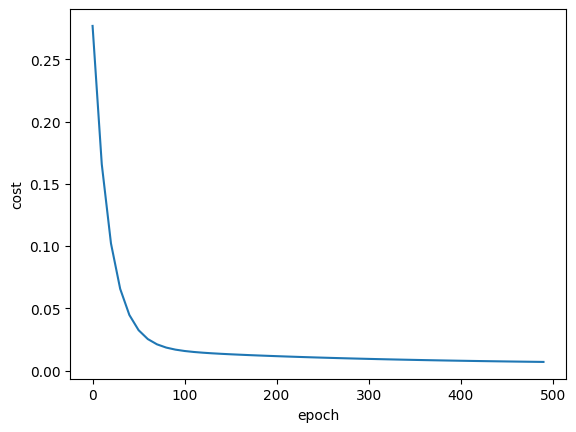

In [37]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

###### Lets do some predictions now. 

In [48]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

print('w:', w)
print('b:', b)
print('area:', 2600)
print('bedrooms:', 4)
print('predict(2600,4,w,b):', predict(2600,4,w,b))

w: [0.70712464 0.67456527]
b: -0.23034857438407427
area: 2600
bedrooms: 4
predict(2600,4,w,b): 128.45484403267596


/home/peter/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [51]:
# predict(1000,2,w,b)
print('w:', w)
print('b:', b)
print('area:', 1000)
print('bedrooms:', 2)
print('predict(1600,2,w,b):', predict(1000,2,w,b))

w: [0.70712464 0.67456527]
b: -0.23034857438407427
area: 1000
bedrooms: 2
predict(1600,2,w,b): 30.253094462442355


/home/peter/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [52]:
# predict(1500,3,w,b)
print('w:', w)
print('b:', b)
print('area:', 1500)
print('bedrooms:', 3)
print('predict(1500,3,w,b):', predict(1500,3,w,b))

w: [0.70712464 0.67456527]
b: -0.23034857438407427
area: 1500
bedrooms: 3
predict(1500,3,w,b): 69.47860785714694


/home/peter/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


<h3 style='color:purple'>(2) Stochastic Gradient Descent Implementation</h3>

#### Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [16]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

3

In [17]:
#def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
def SGD (X, y_true, epochs, learning_rate = 0.01): 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = SGD(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70641316, 0.67260648]), -0.22631391274502907, 0.002302769727650099)

Compare this with weights and bias that we got using gradient descent. They both of quite similar.

In [56]:
print('w:', w)
print('b:', b) 
print('epoch_list_sgd:')
print(epoch_list_sgd)
print('cost_list_sgd:')
print(cost_list_sgd)

w: [0.70712464 0.67456527]
b: -0.23034857438407427
epoch_list_sgd:
[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900]
cost_list_sgd:
[0.4267276367705177, 0.2316776861182046, 0.15800170987075393, 0.019472111594139405, 0.020119136142085388, 0.010574674430189186, 0.004857469603171223, 0.04127145140559127, 0.011811565629330938, 0.0718997233517774, 0.0001747287155561645, 0.0007994335256902437, 0.16956249408136345, 0.0011104403328670803, 0.00043419641659684846, 0.

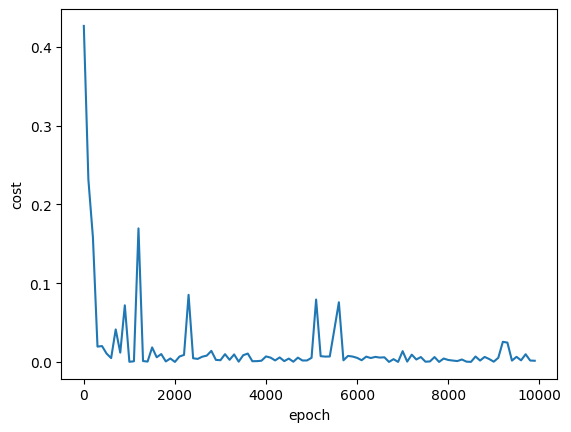

In [19]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [63]:
#predict(2600,4,w_sgd, b_sgd) 
print('area:', 2600)
print('bedrooms:', 4)
print('w_sgd:', w_sgd)
print('b_sgd:', b_sgd)
print('predict(2600,4,w_sgd, b_sgd):',  predict(2600,4,w_sgd, b_sgd))

area: 2600
bedrooms: 4
w_sgd: [0.70641316 0.67260648]
b_sgd: -0.22631391274502907
predict(2600,4,w_sgd, b_sgd): 128.7415792147947


/home/peter/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [64]:
# predict(1000,2,w_sgd, b_sgd)
print('area:', 1000)
print('bedrooms:', 2)
print('w_sgd:', w_sgd)
print('b_sgd:', b_sgd)
print('predict(1000,2,w_sgd, b_sgd):', predict(1000,2,w_sgd, b_sgd))

area: 1000
bedrooms: 2
w_sgd: [0.70641316 0.67260648]
b_sgd: -0.22631391274502907
predict(1000,2,w_sgd, b_sgd): 30.725040706331566


/home/peter/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [65]:
# predict(1500,3,w_sgd, b_sgd)
print('area:', 1500)
print('bedrooms:', 3)
print('w_sgd:', w_sgd)
print('b_sgd:', b_sgd)
print('predict(1500,3,w_sgd, b_sgd):', predict(1500,3,w_sgd, b_sgd))

area: 1500
bedrooms: 3
w_sgd: [0.70641316 0.67260648]
b_sgd: -0.22631391274502907
predict(1500,3,w_sgd, b_sgd): 69.86788479690259


/home/peter/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
